
# CODE TO PERFORM POLYNOMIAL REGRESSION
# Dr. Ryan @STEMplicity
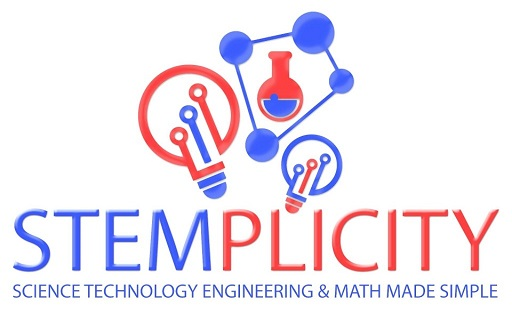



# PROBLEM STATEMENT

Let's assume that you work as a consultant to a start-up company that was looking to develp a model to estimate the cost of good sold as they vary the production volume (number of units produced). The startup gathered data and has asked you to develop a model to predict its cost vs. number of units sold. You thought a polynomial regression model might be a good candidate.

# STEP#1: IMPORT LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP#2: IMPORT DATASET

In [2]:
economyOfScale_df=pd.read_csv('EconomiesOfScale.csv')

In [3]:
economyOfScale_df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [4]:
economyOfScale_df.tail()

,Number of Units,Manufacturing Cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [5]:
economyOfScale_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [6]:
economyOfScale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


# STEP#3: VISUALIZE DATASET

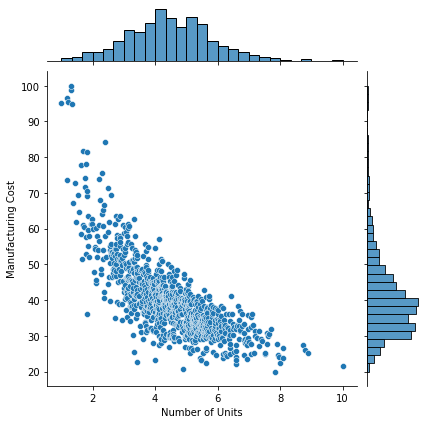

In [7]:
sns.jointplot(x='Number of Units',y='Manufacturing Cost',data=economyOfScale_df)

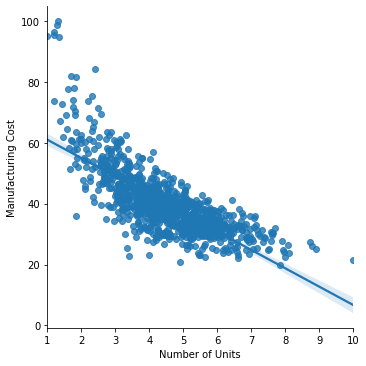

In [8]:
sns.lmplot(x='Number of Units',y='Manufacturing Cost',data=economyOfScale_df)

# STEP#4: CREATE TRAINING DATASET

In [28]:
X_train=economyOfScale_df['Number of Units']

In [25]:
y_train=economyOfScale_df['Manufacturing Cost']

# (SOLUTION #1: LINEAR ASSUMPTION)

# STEP#5 MODEL TRAINING 

In [29]:
X_train.shape

(1000,)

In [26]:
y_train.shape

(1000,)

In [31]:
# # As we have on one column or attribute we need to reshape our data to (-1, 1)
X_train=np.asarray(X_train)
X_train=np.reshape(X_train,(-1, 1))
X_train

array([[ 1.        ],
       [ 1.18599365],
       [ 1.19149864],
       [ 1.2047714 ],
       [ 1.29877282],
       [ 1.30743503],
       [ 1.3393857 ],
       [ 1.3790436 ],
       [ 1.41999951],
       [ 1.47394834],
       [ 1.54089845],
       [ 1.57459986],
       [ 1.62030979],
       [ 1.63199723],
       [ 1.65268704],
       [ 1.69580103],
       [ 1.70421427],
       [ 1.73920139],
       [ 1.76014627],
       [ 1.76700188],
       [ 1.77728035],
       [ 1.7843415 ],
       [ 1.80208917],
       [ 1.81591741],
       [ 1.82328911],
       [ 1.83109722],
       [ 1.83240661],
       [ 1.84287574],
       [ 1.84584064],
       [ 1.86522775],
       [ 1.87414418],
       [ 1.89573077],
       [ 1.9430286 ],
       [ 1.9877704 ],
       [ 1.99190237],
       [ 2.00480379],
       [ 2.05231674],
       [ 2.06492056],
       [ 2.07583577],
       [ 2.1052735 ],
       [ 2.11329869],
       [ 2.11858955],
       [ 2.14190876],
       [ 2.15159002],
       [ 2.17131692],
       [ 2

In [32]:
y_train=np.asarray(y_train)
y_train=np.reshape(y_train,(-1, 1))

In [13]:
from sklearn.linear_model import LinearRegression

In [33]:
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
print('Linear Model Coefficient (m): ',regressor.coef_)
print('Linear Model Coefficient (b): ',regressor.intercept_)

Linear Model Coefficient (m):  [[-6.0333683]]
Linear Model Coefficient (b):  [67.03904193]


# STEP#6: VISUALIZE THE RESULTS

Text(0.5, 1.0, 'Unit Cost Vs. Number of Units [in Millions](Training Dataset)')

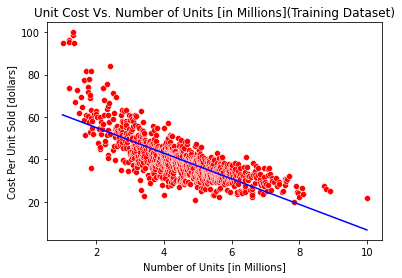

In [39]:
sns.scatterplot(x='Number of Units',y='Manufacturing Cost',data=economyOfScale_df,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.xlabel('Number of Units [in Millions]')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.title('Unit Cost Vs. Number of Units [in Millions](Training Dataset)')

# (SOLUTION #2: POLYNOMIAL ASSUMPTION)

# STEP#5 MODEL TRAINING 

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
poly_regressor=PolynomialFeatures(degree=10)

In [62]:
X_columns=poly_regressor.fit_transform(X_train)
X_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.18599365e+00, 1.40658094e+00, ...,
        3.91434326e+00, 4.64238624e+00, 5.50584060e+00],
       [1.00000000e+00, 1.19149864e+00, 1.41966901e+00, ...,
        4.06207940e+00, 4.83996208e+00, 5.76680823e+00],
       ...,
       [1.00000000e+00, 8.78088812e+00, 7.71039962e+01, ...,
        3.53433369e+07, 3.10345887e+08, 2.72511252e+09],
       [1.00000000e+00, 8.89769971e+00, 7.91690601e+01, ...,
        3.92845656e+07, 3.49542268e+08, 3.11012213e+09],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, ...,
        1.00000000e+08, 1.00000000e+09, 1.00000000e+10]])

In [63]:
regressor=LinearRegression()
regressor.fit(X_columns,y_train)

LinearRegression()

In [64]:
print('Linear Model Coefficient (m): ',regressor.coef_)
print('Linear Model Coefficient (b): ',regressor.intercept_)

Linear Model Coefficient (m):  [[ 0.00000000e+00  8.14424895e+02 -1.40874944e+03  1.17769656e+03
  -5.75749393e+02  1.77346365e+02 -3.54260178e+01  4.57892670e+00
  -3.69247197e-01  1.68714757e-02 -3.33204065e-04]]
Linear Model Coefficient (b):  [-51.43374308]


# STEP#6: VISUALIZE THE RESULTS

In [65]:
y_predict=regressor.predict(X_columns)
y_predict

array([[102.3354418 ],
       [ 89.76714483],
       [ 89.4171286 ],
       [ 88.58048475],
       [ 82.97709301],
       [ 82.49115354],
       [ 80.74554281],
       [ 78.68300377],
       [ 76.67558985],
       [ 74.22137999],
       [ 71.47016686],
       [ 70.20443825],
       [ 68.60947077],
       [ 68.22339036],
       [ 67.56091621],
       [ 66.26361392],
       [ 66.02309811],
       [ 65.06512897],
       [ 64.52303139],
       [ 64.35050763],
       [ 64.09627829],
       [ 63.92465929],
       [ 63.50396284],
       [ 63.18646331],
       [ 63.02079089],
       [ 62.84797188],
       [ 62.81925559],
       [ 62.59235303],
       [ 62.52895459],
       [ 62.12353967],
       [ 61.94227758],
       [ 61.51646663],
       [ 60.6438841 ],
       [ 59.88750288],
       [ 59.82074062],
       [ 59.61544758],
       [ 58.89804393],
       [ 58.71716285],
       [ 58.56346063],
       [ 58.16173767],
       [ 58.05527586],
       [ 57.98576557],
       [ 57.68552567],
       [ 57

In [66]:
y_predict.shape

(1000, 1)

Text(0.5, 1.0, 'Unit Cost Vs. Number of Units [in Millions](Training Dataset) (Poly order=5)')

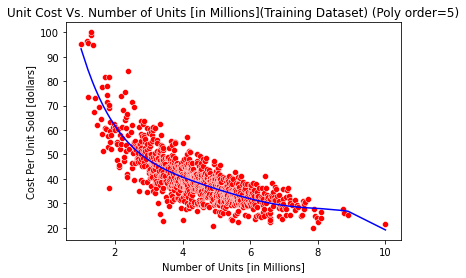

In [60]:
sns.scatterplot(x='Number of Units',y='Manufacturing Cost',data=economyOfScale_df,color='red')
plt.plot(X_train,y_predict,color='blue')
plt.xlabel('Number of Units [in Millions]')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.title('Unit Cost Vs. Number of Units [in Millions](Training Dataset) (Poly order=5)')

Text(0.5, 1.0, 'Unit Cost Vs. Number of Units [in Millions](Training Dataset) (Poly order=10)')

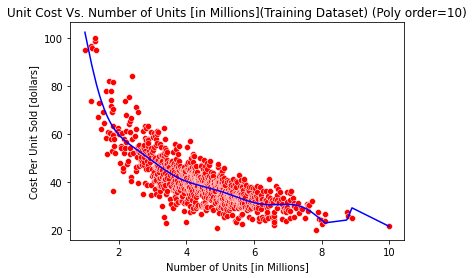

In [67]:
sns.scatterplot(x='Number of Units',y='Manufacturing Cost',data=economyOfScale_df,color='red')
plt.plot(X_train,y_predict,color='blue')
plt.xlabel('Number of Units [in Millions]')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.title('Unit Cost Vs. Number of Units [in Millions](Training Dataset) (Poly order=10)')

# EXCELLENT JOB! NOW YOU BECAME FAMILIAR WITH POLYNOMIAL REGRESSION!